In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Model
from keras.layers import Dense, Input, Dropout

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


from PIL import Image
import PIL.ImageOps

In [67]:
data = pd.read_csv("mnist_train_small.csv")

In [68]:
X = data.values[:,2:]
y = data.values[:,1]

In [69]:
ohe = OneHotEncoder(categories="auto")

In [70]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [144]:
in_layer = Input(shape=[784])
dense_1 = Dense(200, activation="tanh")(in_layer)

dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.5)(dense_2)
dense_3 = Dense(50, activation="tanh")(drop)

out = Dense(10, activation="softmax")(dense_3)


In [145]:
model = Model(inputs=[in_layer], outputs=[out])

In [146]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [147]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [148]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
5360/5360 [==============================] - 1s 168us/step - loss: 1.7828 - acc: 0.3991
Epoch 2/50
5360/5360 [==============================] - 0s 69us/step - loss: 0.9965 - acc: 0.6993
Epoch 3/50
5360/5360 [==============================] - 0s 64us/step - loss: 0.7498 - acc: 0.7823
Epoch 4/50
5360/5360 [==============================] - 0s 73us/step - loss: 0.6211 - acc: 0.8237
Epoch 5/50
5360/5360 [==============================] - 0s 74us/step - loss: 0.5427 - acc: 0.8373
Epoch 6/50
5360/5360 [==============================] - 0s 63us/step - loss: 0.4955 - acc: 0.8470
Epoch 7/50
5360/5360 [==============================] - 0s 65us/step - loss: 0.4679 - acc: 0.8655
Epoch 8/50
5360/5360 [==============================] - 0s 65us/step - loss: 0.4683 - acc: 0.8543
Epoch 9/50
5360/5360 [==============================] - 0s 69us/step - loss: 0.4273 - acc: 0.8701
Epoch 10/50
5360/5360 [==============================] - 0s 58us/step - loss: 0.4211 - acc: 0.8739
Epoch 11/50
5360/5

In [149]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 0s 161us/step


[0.3357623464230335, 0.9011363636363636]

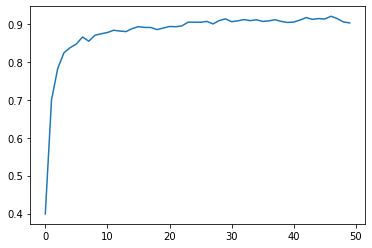

In [150]:
plt.plot(hist.history["acc"])

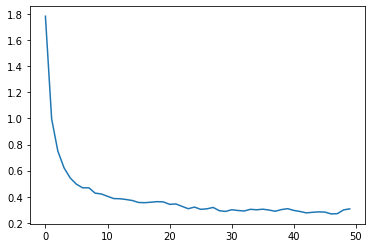

In [151]:
plt.plot(hist.history["loss"])

In [152]:
import cv2

In [153]:
img = cv2.imread("nums/five.jpeg")

In [154]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [155]:
small = cv2.resize(gray, (28,28))

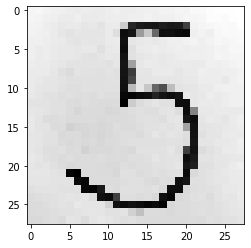

In [156]:
plt.imshow(small, cmap="gray")

In [157]:
invert = (small < 100).astype(int) * 255

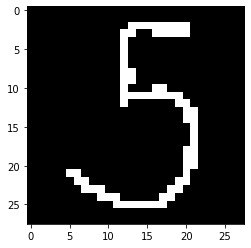

In [158]:
plt.imshow(invert, cmap="gray")

In [159]:
np.argmax(model.predict(invert.flatten().reshape(1,-1)))

6